In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

from ising_grid import Grid, Network

In [2]:
def plot_grid(graph,mark_subsystems=True):
    fig = plt.figure(figsize=(10,10))
    ax = fig.subplots(1,1)
    
    for edge in graph.edges:
        e = np.array(edge).T
        ax.plot(e[0],e[1],'k-',zorder=0)
        
    if mark_subsystems:  
        
        for n,attr in graph.nodes.items():
            if attr['subsystem'] == 0:
                ax.scatter(n[0],n[1],c='r')
            elif attr['subsystem'] == 1:
                ax.scatter(n[0],n[1],c='b')
            else:
                ax.scatter(n[0],n[1],c='k')    

    else:
        for n,attr in graph.nodes.items():
            ax.scatter(n[0],n[1],c='k')

            
            
def plot_network(graph,mark_subsystems=True):
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.subplots(1,1)
    
    node_color = ['k' for n in graph.nodes()]
    if mark_subsystems:  
        sub = nx.get_node_attributes(graph,'subsystem')
        c = {0:'r',1:'b'}
        node_color = [c[v] for k,v in sub.items()]

    nx.draw_networkx(G=graph,
                     ax=ax,
                     node_color=node_color,
                     with_labels=False)
            
            

# Ising-like rectangular grid

## single system

In [3]:
Lx = 8
Ly = 12
g = Grid.grid_2d(size_x = Lx,
                 size_y = Ly)

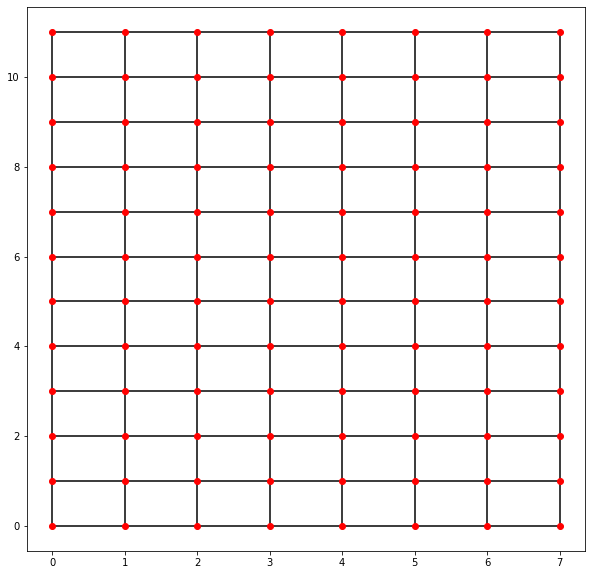

In [4]:
plot_grid(g)

In [6]:
Grid.save_graph(g,f'connectomes/ising_grid_{Lx}x{Ly}_nonperiodic.npz')

## two partially disconnected subsystems (sliced)

In [7]:
Lx = 20
Ly = 20
slice_ix = 5
remove_frac = 0.7

g = Grid.grid_2d_sliced(size_x = Lx,
                        size_y = Ly,
                        slice_ix = slice_ix, # which index to slice
                        row = False, #slice horizontally or vertically
                        remove_frac = remove_frac) # remove a fraction of links (deterministic)

removing 14 out of 20 edges on the boundary


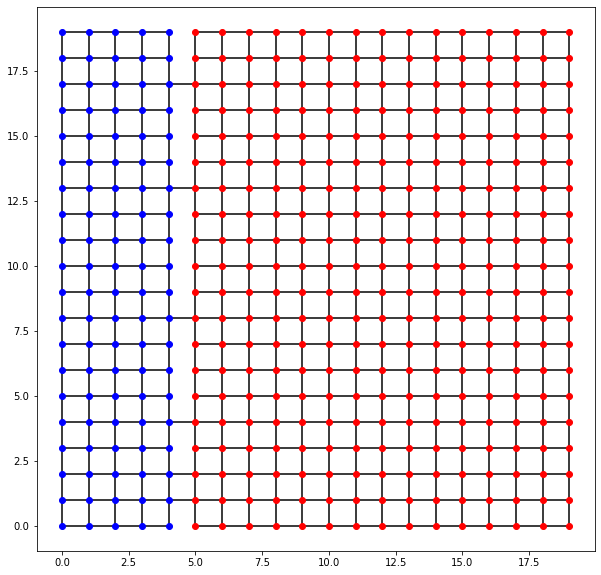

In [8]:
plot_grid(g)

In [9]:
Grid.save_graph(g,f'connectomes/ising_slice_col_{Lx}x{Ly}_ix={slice_ix}_frac={remove_frac}_nonperiodic.npz')

## two partially disconnected subsystems (patch)

In [10]:
Lx = 20
Ly = 14
x0 = 5
y0 = 8
dx = 3
dy = 2

remove_frac = 0.7

g = Grid.grid_2d_patch(size_x = Lx,
                       size_y = Ly,
                       x0 = x0, # x coord of the lower-left corner of the patch
                       y0 = y0, # y coord of the lower-left corner of the patch
                       dx = dx, # x width of the patch
                       dy = dy, # y width of the patch
                       remove_frac = remove_frac) # remove a fraction of links (deterministic)


removing 9 out of 14 edges on the boundary


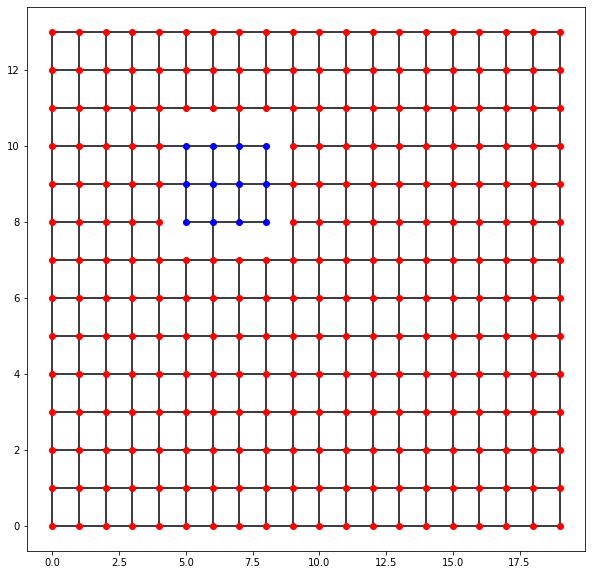

In [11]:
plot_grid(g)

In [12]:
Grid.save_graph(g,f'connectomes/ising_patch_{Lx}x{Ly}_{x0}-{y0}_{dx}x{dy}_frac={remove_frac}_nonperiodic.npz')

### patch in the center

In [13]:
Lx = 16
Ly = 16
lx = 2
ly = 2
x0 = (Lx-lx)//2
y0 = (Ly-ly)//2
dx = lx
dy = ly

remove_frac = 0.8

g = Grid.grid_2d_patch(size_x = Lx,
                       size_y = Ly,
                       x0 = x0, # x coord of the lower-left corner of the patch
                       y0 = y0, # y coord of the lower-left corner of the patch
                       dx = dx, # x width of the patch
                       dy = dy, # y width of the patch
                       remove_frac = remove_frac) # remove a fraction of links (deterministic)



removing 9 out of 12 edges on the boundary


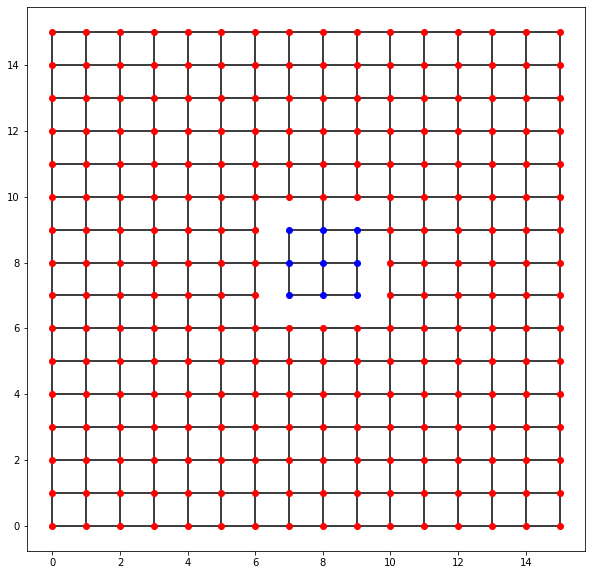

In [14]:
plot_grid(g)

In [15]:
Grid.save_graph(g,f'connectomes/ising_patch_{Lx}x{Ly}_center_{dx}x{dy}_frac={remove_frac}_nonperiodic.npz')

# Random networks

### Watts-Strogatz

In [74]:
nodes = 100
mean_degree = 10
prob = 0.3 # rewiring probability 

g = Network.watts_strogatz(nodes = nodes, mean_degree = mean_degree, prob = prob)

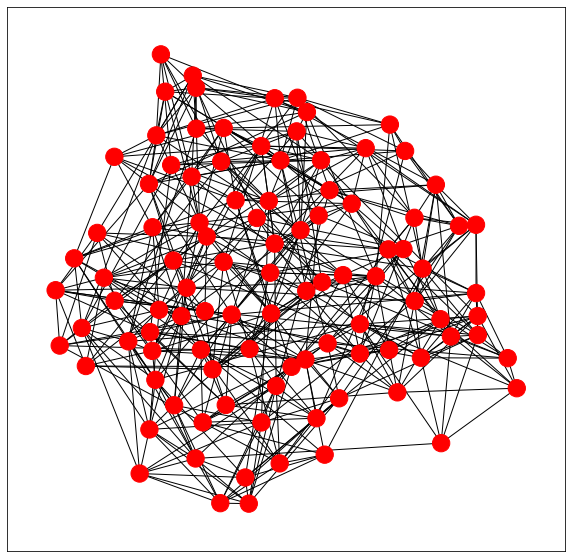

In [75]:
plot_network(g)

### Erdos-Renyi

In [9]:
nodes = 100
prob = 0.2 # rewiring probability

g = Network.erdos_renyi(nodes = nodes, prob = prob)

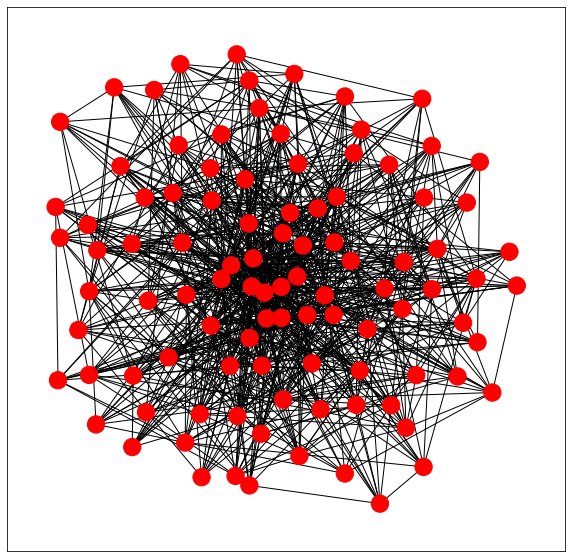

In [68]:
plot_network(g)

### Barabasi-Albert

In [70]:
nodes = 100
edge_num = 10 # number of edges in new nodes

g = Network.barabasi_albert(nodes = nodes, edge_num = edge_num)

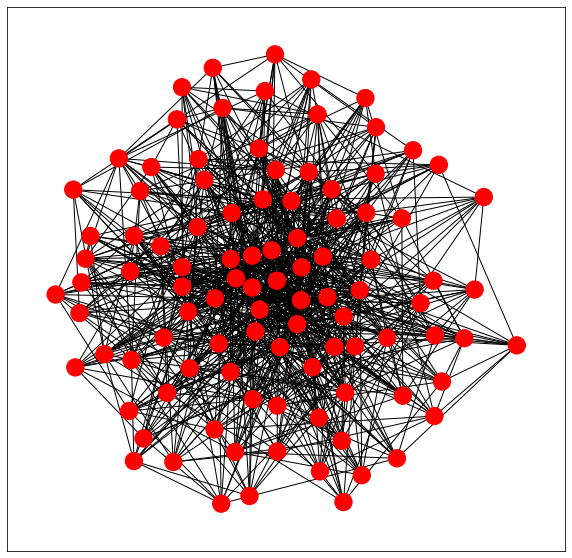

In [71]:
plot_network(g)

### two partially disconnected subsystems of Barabasi-Albert network 

In [72]:
nodes = 100
edge_num = 10 # number of edges in new nodes

g = Network.barabasi_albert(nodes = nodes, edge_num = edge_num)

n_subnodes = 30
remove_frac = 0.9
g0 = Network.patch(graph = g, n_subnodes = n_subnodes, remove_frac = remove_frac)

removing 335 out of 373 edges on the boundary


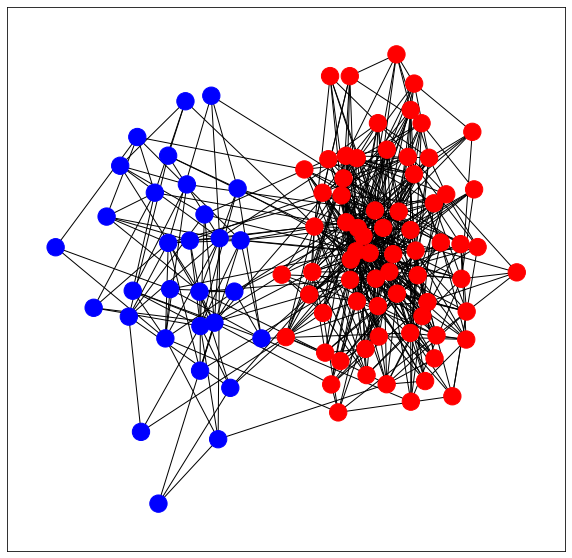

In [73]:
plot_network(g0)